# 다이나믹 프로그래밍
### 어려우니 한번 더 공부할것!
* 큰 문제를 작은 단위로 나누어 작은 문제들을 푸는 방식으로
* 각 작은 문제가 이미 풀었던 문제라면 더 풀지않고 한 번만 풀어 문제를 효율적으로 해결하는 알고리즘

### 피보나치 수열 - 완전 탐색(Brute-Force)으로 수행한 예시
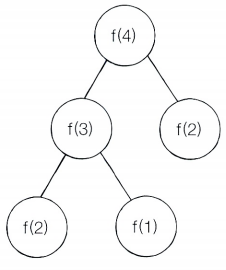 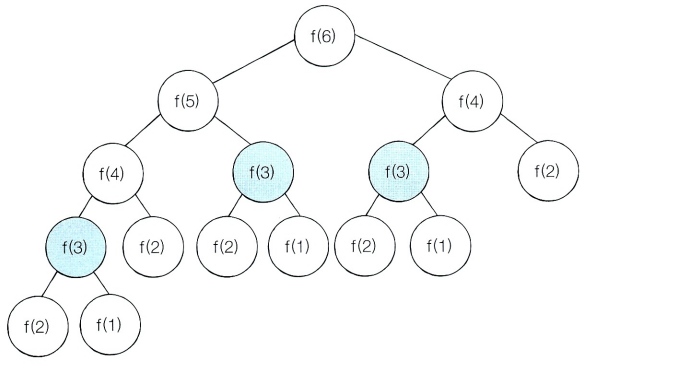

In [5]:
""" Python - 피보나치 수열 - 시간복잡도 O(2^N) """
# n개에 대한 함수 f() -> f(6)을 호출할 경우, f(3)이 3번 호출됨

def fibo(x):
    # 종료 조건 : 배열의 첫 또는 두 번째일 때 1 반환(=이걸 해줘야 다음 값을 더하면서 연산 가능)
    if x == 1 or x == 2:
        return 1
    return fibo(x-1) + fibo(x-2)

print(fibo(4))  # f(4)를 호출하였을 때 f(1)또는 f(2)가 호출되는 수
print(fibo(6))  # f(6)을 호출하였을 때 "

3
8


### <중요> 메모이제이션(Memoization) 기반 피보나치 수열 - 다이나믹 프로그래밍
- 민준이형이 DFS/BFS 문제 풀었을 때 시간초과 문제 발생했던 그런 문제들은 이를 통해 해결할 수 있다

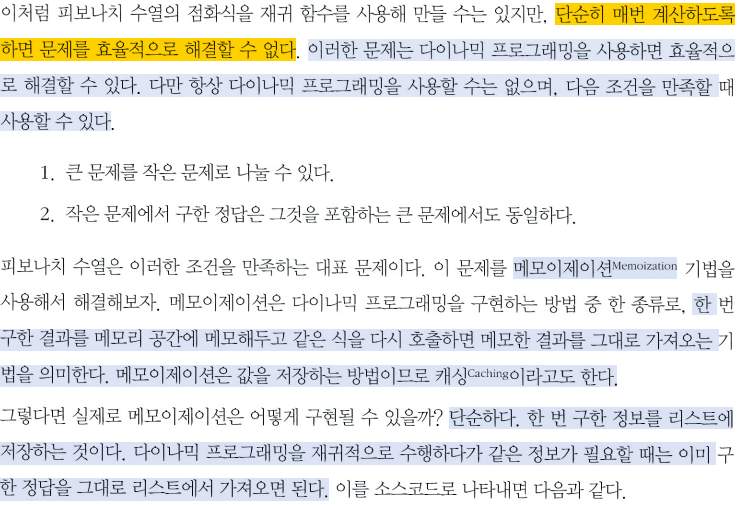
* <결론> ***한 번 푼 문제는 그 결과를 저장해두었다가 ***
* ***나중에 동일한 문제를 풀어야 할 때 이미 저장한 값을 반환한다***

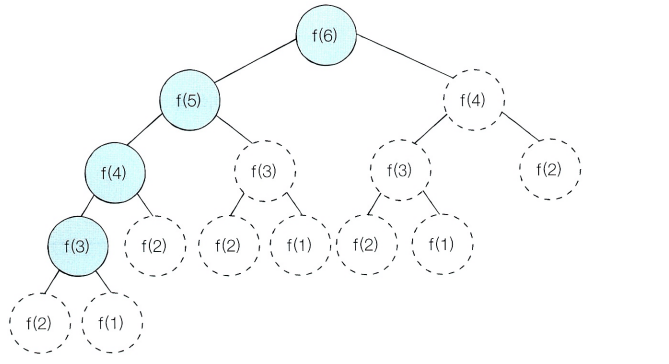
* 메모이제이션 기법을 이용했을 경우 그림과 같이
* f(6) 호출 시, 하늘색으로 칠한 부분만 딱 한 번씩 수행하고 저장해뒀다가, 나머지 오른쪽들을 수행하려 할 때 그 기록을 가져와서 수행할 필요가 없어지는 것이다.
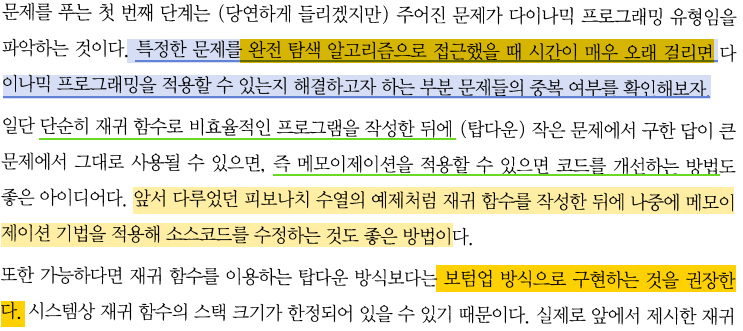

In [17]:
''' Python - 피보나치수열 - Bottom Up (주로 사용) - O(N) '''

# (중요) 한 번 계산된 결과를 메모이제이션하기 위한 리스트 생성
d = [0]*100

# 첫 번째 피보나치 수와 두 번째 피보나치 수 저장
d[1] = 1
d[2] = 1
n = 99

# 바텀업 다이나믹 프로그래밍
for i in range(3, n+1):       # (중요) 3번째부터 계산해나감
    d[i] = d[i-1] + d[i-2]    # 매번 계산해서 넣어줌(=메모)한다고 생각
    
print(d[4])
print(d[6])

3
8


In [14]:
''' Python - 피보나치수열 - Top Down - O(N) '''

# (중요) 한 번 계산된 결과를 메모이제이션하기 위한 리스트 생성
d = [0]*100

# 탑다운 다이나믹 프로그래밍
def fibo(x):
    print('f(', str(x), ')', end=' ')
    
    # 종료 조건 : 배열의 첫 또는 두 번째일 때 1 반환(=이걸 해줘야 다음 값을 더하면서 연산 가능)
    if x == 1 or x == 2:
        return 1
    
    # (중요) 만약 이미 계산한 적 있는 문제일 경우 결과값 그대로 반환 - 먼저 선언해야!!
    if d[x] != 0:
        return d[x]
    
    # (중요) x에 대해 계산하는데, recursive하게 f(1), f(2)까지 함수 호출하여 연산 수행
    #        -> 만약 아직 계산하지 않았던 문제라면 점화식에 따라 피보나치 결과 반환
    d[x] = fibo(x-1) + fibo(x-2)
    
    return d[x] # 원하는 x번째 값을 연산했으니 리턴

print(fibo(4))   # 앞서 작성한 코드보다 매우 빠르게 수행됨!
print(fibo(6))   # 앞서 작성한 코드보다 매우 빠르게 수행됨!

f( 4 ) f( 3 ) f( 2 ) f( 1 ) f( 2 ) 3
f( 6 ) f( 5 ) f( 4 ) f( 3 ) f( 4 ) 8


---
---
## 문제1. 1로만들기

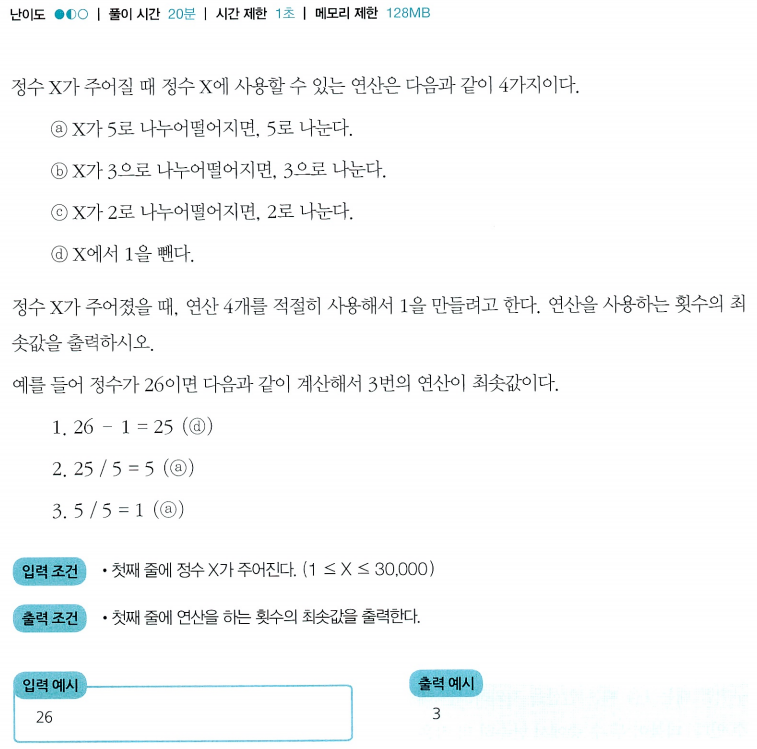
### ㅡ> 피보나치와 비슷하게 풀면 된다고 생각하면 편함

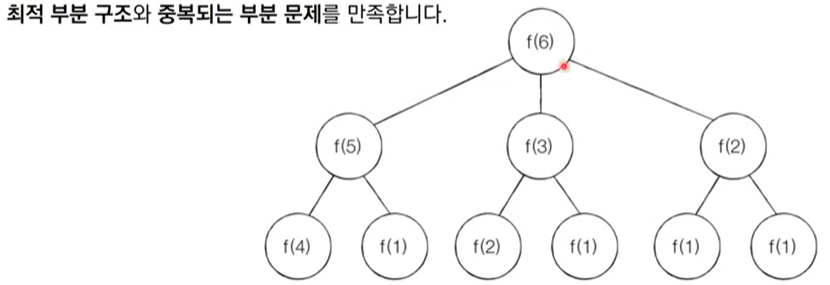

In [8]:
''' python '''
#x = int(input())
a=6

d = [0] * 100             # 카운팅하는 값(=호출된 횟수)이 들어감

for x in range(2, a+1):   # x는 인덱스값이고

    d[x] = d[x-1] + 1     # d[6]에 d[5]가 한번 카운팅됨 = +1
    
    if x % 2 == 0:                    # f[6]이 2로 나눠질 경우,
        d[x] = min(d[x//2]+1, d[x])   # f[6//2]에 +1을 카운팅했을 경우와 f[6-1] 카운팅 수 중 작은 카운팅을 재정의
        
    if x % 3 == 0:
        d[x] = min(d[x//3]+1, d[x])   # f[6//3]에+1 한것과 f[6//2]+1 와 f[6-1] 중 비교
        
    if x % 5 == 0:
        d[x] = min(d[x//5]+1, d[x])
    
    
print(d)
print(d[a])

[0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2


---
---

## 문제2. 개미전사

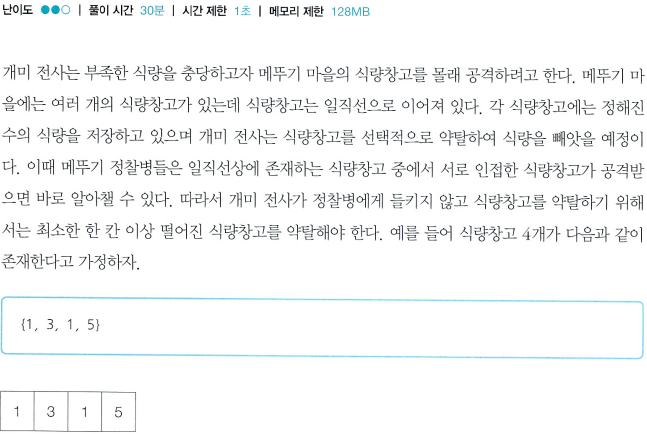
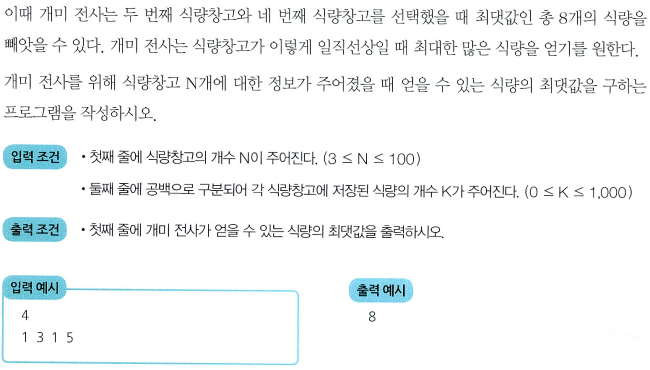

### ㅡ> 피보나치와 비슷하게 풀면 된다고 생각하면 편함

In [26]:
''' python '''

#n = int(input())
#k = list(map(int, input().split()))


k = [1,3,1,5,2,4,6,1]
#k = [1,3,1,5]
n = len(k)

d = [0]*50

d[0], d[1]=k[0],k[1]

for i in range(2, n):
    d[i] = max(k[i], k[i]+d[i-2])
    # d[i-2]를 활용하는 이유는 d[i-2]에 있는 숫자가 d[i-4]에 있는 수를 ... recursive하게 값을 갖고있음
    
print(d)
print(max(d))

[1, 3, 2, 8, 4, 12, 10, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13


---
---
## 문제3. 효율적인 화폐 구성

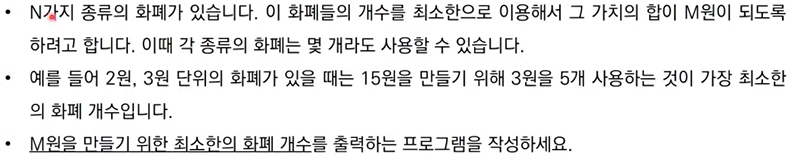
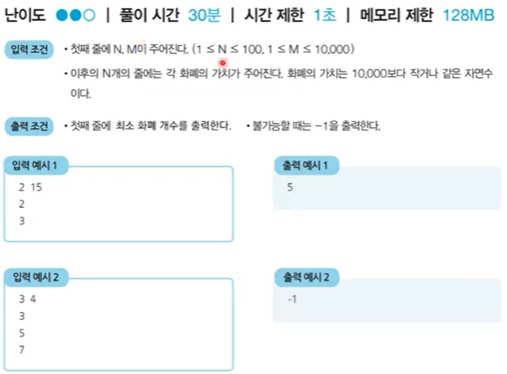

### 문제 해결 전략
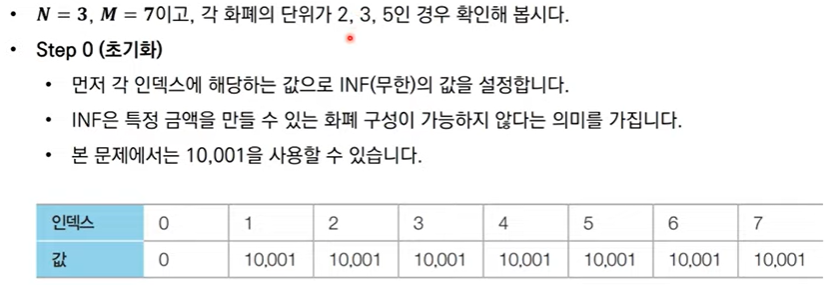
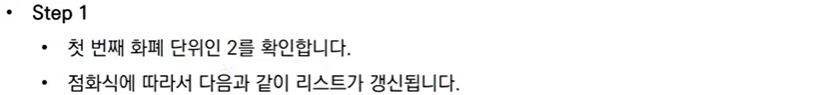
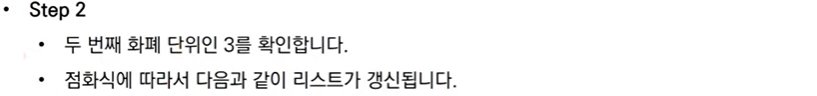
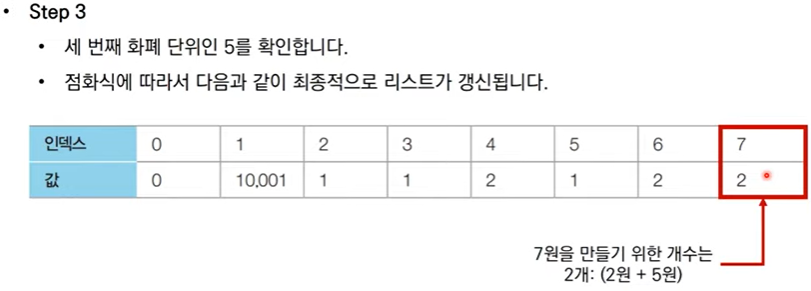

In [29]:
''' python '''

#n, m = map(int,input().split())
#array = [input() for _ in range(n)]

n = 3
m = 7
array = [2, 3, 5]

d = [10001] * (m+1)   # 각 인덱스에 해당하는 값은 INF(무한)으로 설정하는데, 이 문제에선 10,001을 사용

d[0] = 0

# 다이나믹 프로그래밍
for i in array:                   # 각각의 화폐 단위를 가져옴
    for j in range(i, m+1):       # 계산할 현재 금액
        if d[j - i] != 10001:     # (중요) 이전 금액을 봄 => (현재 금액 - 화폐단위 금액)계산한 금액이 있다면
            d[j] = min(d[j], d[j - i] + 1)   # 이전 금액에 인덱스 위치의 값에 +1한 것과 비교
        
print(d)
if d[m] == 10001:      # m원을 만들 방법이 없는 경우
    print(-1)
else:
    print(d[m])

[0, 10001, 1, 1, 2, 1, 2, 2]
2
